In [6]:
# importing libraries

import pandas as pd
import numpy as np
from numpy import median
from scipy import stats
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

#suppress warnings
import warnings
warnings.filterwarnings('ignore')
import os

In [7]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [8]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [9]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
df.shape

(1470, 35)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [13]:
df.dtypes.value_counts()

int64     26
object     9
dtype: int64

In [14]:
df.describe(include="all")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [15]:
# setting options to inspect all columns
pd.options.display.max_columns =36

#inspecting the structure of the dataframe

df.sample(5).transpose()

,1469,879,664,377,1072
Age,34,60,36,36,29
Attrition,No,No,No,No,No
BusinessTravel,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Frequently
DailyRate,628,696,1425,329,410
Department,Research & Development,Sales,Research & Development,Research & Development,Research & Development
DistanceFromHome,8,7,14,2,2
Education,3,4,1,3,1
EducationField,Medical,Marketing,Life Sciences,Life Sciences,Life Sciences
EmployeeCount,1,1,1,1,1
EmployeeNumber,2068,1233,924,501,1513


In [16]:
df.index

RangeIndex(start=0, stop=1470, step=1)

In [17]:
df.values

array([[41, 'Yes', 'Travel_Rarely', ..., 4, 0, 5],
       [49, 'No', 'Travel_Frequently', ..., 7, 1, 7],
       [37, 'Yes', 'Travel_Rarely', ..., 0, 0, 0],
       ...,
       [27, 'No', 'Travel_Rarely', ..., 2, 0, 3],
       [49, 'No', 'Travel_Frequently', ..., 6, 0, 8],
       [34, 'No', 'Travel_Rarely', ..., 3, 1, 2]], dtype=object)

In [18]:
df.axes

[RangeIndex(start=0, stop=1470, step=1),
 Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
        'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
        'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'],
       dtype='object')]

In [19]:
df.duplicated().sum()

0

In [20]:
#reassign response variable as it was object type so from yes or no to 1 or 0

df['Attrition'] = df['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

In [21]:
df.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [22]:
# dropping the least count labels

df1 = df.drop(labels=['Over18','StandardHours','EmployeeCount'], axis = 1)

In [23]:
# moving respose variable to last column

front = df1['Attrition']
df1.drop(labels=['Attrition'],axis = 1, inplace = True)
df1.insert(31,'Attrition',front)
df1.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0


In [24]:
#changing object type to category

cols =['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for col in cols:
    df1[col] = df1[col].astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   BusinessTravel            1470 non-null   category
 2   DailyRate                 1470 non-null   int64   
 3   Department                1470 non-null   category
 4   DistanceFromHome          1470 non-null   int64   
 5   Education                 1470 non-null   int64   
 6   EducationField            1470 non-null   category
 7   EmployeeNumber            1470 non-null   int64   
 8   EnvironmentSatisfaction   1470 non-null   int64   
 9   Gender                    1470 non-null   category
 10  HourlyRate                1470 non-null   int64   
 11  JobInvolvement            1470 non-null   int64   
 12  JobLevel                  1470 non-null   int64   
 13  JobRole                   1470 non-null   catego

In [25]:
df1[cols].nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

In [26]:
for col in cols:
    display(df1[col].value_counts())

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Male      882
Female    588
Name: Gender, dtype: int64

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

No     1054
Yes     416
Name: OverTime, dtype: int64

In [27]:
pip install plotly 

Note: you may need to restart the kernel to use updated packages.


In [28]:
import plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

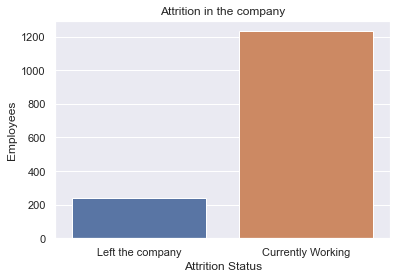

Currently Working    1233
Left the company      237
Name: Attrition, dtype: int64

In [29]:
targvar = df1['Attrition'].apply(lambda x: 'Currently Working' if x==0 else 'Left the company')
sns.countplot(targvar)
plt.title('Attrition in the company')
plt.xlabel('Attrition Status')
plt.ylabel('Employees')
plt.show()
targvar.value_counts()

In [36]:
#creating a dataframe for each feature

def table_df(x):
    feature = df1.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})
    feature.columns = [' '.join(col).strip() for col in feature.columns.values]
    feature = feature.reset_index()
    feature['Attrition mean'] = feature['Attrition mean']*100
    feature.columns = [x, 'Total Employee ', 'Attrition Number', 
                       '% of Attrition in the Relevant Group'] 
    feature['% of Attrition in the Company'] = (feature['Attrition Number'] / 237)*100
        
    return feature

In [37]:
def graph_df(x, y = 'bar', z = 0):
    
    
    feature = df1.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})
    feature.columns = [' '.join(col).strip() for col in feature.columns.values]
    feature = feature.reset_index()
    feature['Attrition mean'] = feature['Attrition mean']*100
    feature.columns = [x, 'Total Employee', 'Attrition Number', 
                       '% of Attrition in the Relevant Group'] 
    
    fig0, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    feature.set_index(feature[x], drop=True, inplace=True)
    feature['Total Employee'].plot(kind = y, stacked = True, ax = ax1, 
                                   colormap = 'winter', rot = z)
    feature['% of Attrition in the Relevant Group'].plot(use_index = False, 
                                                         kind = 'line', ax = ax2, colormap='Spectral')
    plt.title('Attrition compared to' + " " + x  + " " + "Groups")
    ax1.set_xlabel(x)
    ax1.yaxis.label.set_color('blue')
    ax1.set_ylabel("Total Employee")
    ax2.set_ylabel("Attrition Percentage in the Relevant Group")
    ax2.yaxis.label.set_color('red')
    plt.tight_layout()
    plt.show()

In [38]:
#AGE

table_df(x = 'Age')
bins = [17, 21, 25, 35, 60]
group_names = ['(18-21)', '(22-25)', '(26-35)', '(36-60)']
df1['Age'] = pd.cut(df1['Age'], bins, labels = group_names)
# Age Group & Attrition Table
table_df(x = 'Age')

,Age,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,(18-21),41,22,53.658537,9.282700
1,(22-25),82,22,26.829268,9.282700
2,(26-35),606,116,19.141914,48.945148
3,(36-60),741,77,10.391363,32.489451


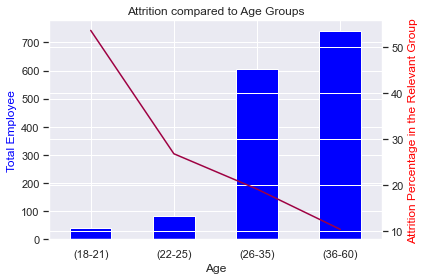

In [39]:
#comparing Attrition to Age
graph_df(x='Age')

##### The Attrition is more among the age group 18-21 comprising 53% and overall comprising about 9%. The highest among all is 26-35 group comprising 49% in the company

In [40]:
# Business Travel & Attrition Table
table_df(x = 'BusinessTravel')


,BusinessTravel,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Non-Travel,150,12,8.000000,5.063291
1,Travel_Frequently,277,69,24.909747,29.113924
2,Travel_Rarely,1043,156,14.956855,65.822785


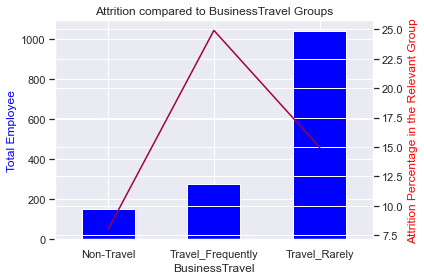

In [41]:
# Attrition compared to Business Travel Group Graph
graph_df(x = 'BusinessTravel')

The highest attrition number among the group who travel rarely comprising 15% among the other groups and 65% overall the company.
If we noice among the individual group, people who travel frequently have the highest percentage comprising 25%.

In [42]:
# Department 

table_df(x = 'Department')


,Department,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Human Resources,63,12,19.047619,5.063291
1,Research & Development,961,133,13.839750,56.118143
2,Sales,446,92,20.627803,38.818565


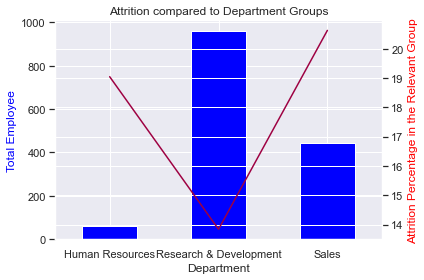

In [43]:
# Attrition compared to Department Graph
graph_df(x = 'Department')

The Research and development shows the majority of the attrition number among their total employees comprising 13% and highest among the other groups comprising 56% of the attrition of the company.
The next comes the Sales department comprising 38% of Attrition in the company.

In [44]:
#Distance from home

table_df(x = 'DistanceFromHome')
bins = [0, 3, 6, 10, 29]
group_names = ['1-3', '4-6', '7-10', '10+']
df1['DistanceFromHome'] = pd.cut(df1['DistanceFromHome'], bins, labels = group_names)

# Distance From Home Group & Attrition Table
table_df(x = 'DistanceFromHome')

,DistanceFromHome,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1-3,503,68,13.518887,28.691983
1,4-6,188,26,13.829787,10.970464
2,7-10,335,50,14.925373,21.097046
3,10+,444,93,20.945946,39.240506


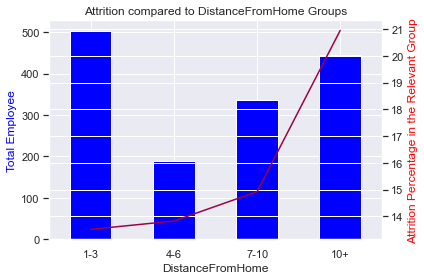

In [45]:
# Attrition compared to Distance From Home Graph
graph_df(x = 'DistanceFromHome')

In [46]:
#Education
table_df(x = 'Education')
df1['Education'] = df1['Education'].map({1:'Below College', 2:'College', 
                                         3:'Bachelor', 4:'Master', 5:'Doctor'})
# Education Level & Attrition Table
table_df(x = 'Education')

,Education,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Bachelor,572,99,17.307692,41.772152
1,Below College,170,31,18.235294,13.080169
2,College,282,44,15.602837,18.565401
3,Doctor,48,5,10.416667,2.109705
4,Master,398,58,14.572864,24.472574


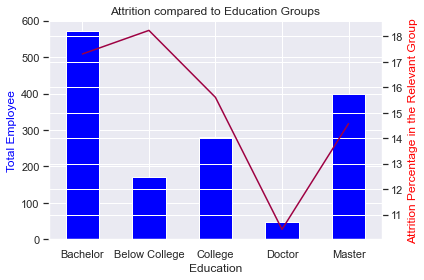

In [47]:
# Attrition compared to Education Level Graph
graph_df(x = 'Education')


In [48]:
# Education Field & Attrition Table
table_df(x = 'EducationField')


,EducationField,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Human Resources,27,7,25.925926,2.953586
1,Life Sciences,606,89,14.686469,37.552743
2,Marketing,159,35,22.012579,14.767932
3,Medical,464,63,13.577586,26.582278
4,Other,82,11,13.414634,4.641350
5,Technical Degree,132,32,24.242424,13.502110


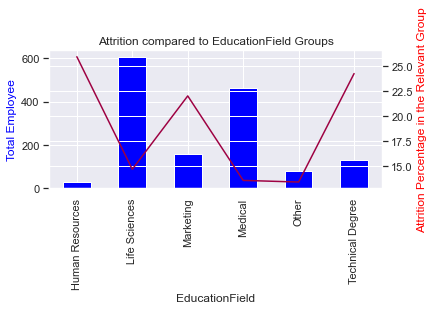

In [49]:
# Attrition compared to Education Field Graph
graph_df(x = 'EducationField', z = 90)

In [50]:
# Labeling environment satisfaction
table_df(x = 'EnvironmentSatisfaction')
df1['EnvironmentSatisfaction'] = df1['EnvironmentSatisfaction'].map({1:'Low', 2:'Medium', 
                                                                     3:'High', 4:'Very High'})
# Environment & Attrition Table
table_df(x = 'EnvironmentSatisfaction')

,EnvironmentSatisfaction,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,High,453,62,13.686534,26.160338
1,Low,284,72,25.352113,30.379747
2,Medium,287,43,14.982578,18.143460
3,Very High,446,60,13.452915,25.316456


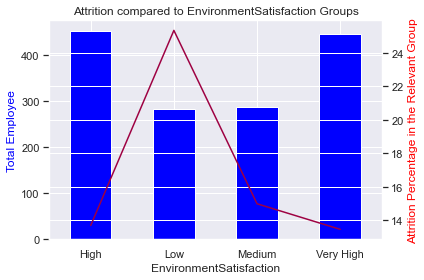

In [51]:
# Attrition compared to Environment Satisfaction Graph
graph_df(x = 'EnvironmentSatisfaction')

In [52]:
# Gender & Attrition Table
table_df(x = 'Gender')



,Gender,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Female,588,87,14.795918,36.708861
1,Male,882,150,17.006803,63.291139


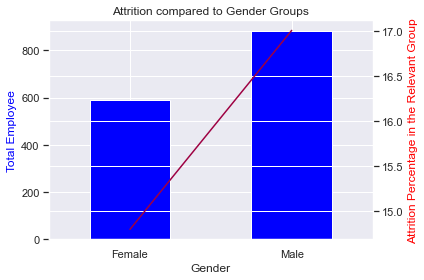

In [53]:
# Attrition compared to Gender Graph
graph_df(x = 'Gender')

In [54]:
# Labeling Job Involvement Groups
table_df(x = 'JobInvolvement')
df1['JobInvolvement'] = df1['JobInvolvement'].map({1:'Low', 2:'Medium', 
                                                   3:'High', 4:'Very High'})
# Job Involvement & Attrition Table
table_df(x = 'JobInvolvement')

,JobInvolvement,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,High,868,125,14.400922,52.742616
1,Low,83,28,33.734940,11.814346
2,Medium,375,71,18.933333,29.957806
3,Very High,144,13,9.027778,5.485232


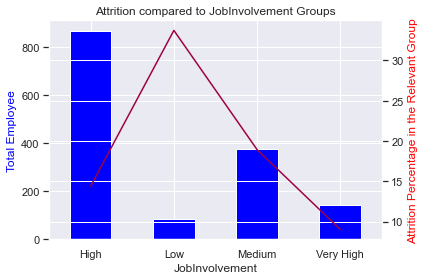

In [55]:
# Attrition compared to Job Involvement Graph
graph_df(x = 'JobInvolvement')

In [56]:
# Labeling job levels
table_df(x = 'JobLevel')
df1['JobLevel'] = df1['JobLevel'].map({1:'Level-1', 2:'Level-2', 
                                       3:'Level-3', 4:'Level-4', 5:'Level-5'})
# Job Level & Attrition Table
table_df(x = 'JobLevel')

,JobLevel,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Level-1,543,143,26.335175,60.337553
1,Level-2,534,52,9.737828,21.940928
2,Level-3,218,32,14.678899,13.502110
3,Level-4,106,5,4.716981,2.109705
4,Level-5,69,5,7.246377,2.109705


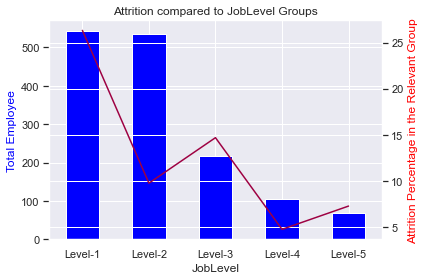

In [57]:
# Attrition compared to Job Level Graph
graph_df(x = 'JobLevel')


In [58]:
# Job Role & Attrition Table
table_df(x = 'JobRole')

,JobRole,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Healthcare Representative,131,9,6.870229,3.797468
1,Human Resources,52,12,23.076923,5.063291
2,Laboratory Technician,259,62,23.938224,26.160338
3,Manager,102,5,4.901961,2.109705
4,Manufacturing Director,145,10,6.896552,4.219409
5,Research Director,80,2,2.500000,0.843882
6,Research Scientist,292,47,16.095890,19.831224
7,Sales Executive,326,57,17.484663,24.050633
8,Sales Representative,83,33,39.759036,13.924051


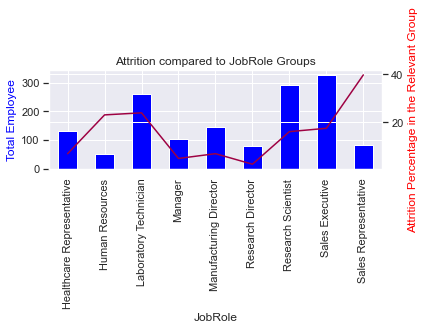

In [59]:
# Attrition compared to Job Role Graph
graph_df(x = 'JobRole', z = 90)

In [60]:
# Labeling Job Role 
table_df(x = 'JobSatisfaction')
df1['JobSatisfaction'] = df1['JobSatisfaction'].map({1:'Low', 2:'Medium',
                                                     3:'High', 4:'Very High'})                                               
# Job Satisfaction & Attrition Table
table_df(x = 'JobSatisfaction')

,JobSatisfaction,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,High,442,73,16.515837,30.801688
1,Low,289,66,22.837370,27.848101
2,Medium,280,46,16.428571,19.409283
3,Very High,459,52,11.328976,21.940928


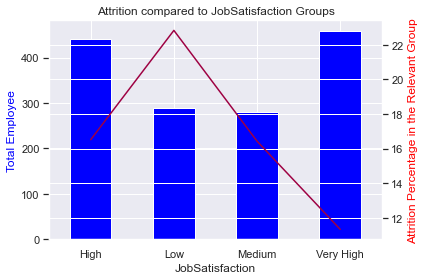

In [61]:
# Attrition compared to Job Satisfaction
graph_df(x = 'JobSatisfaction')

In [62]:
# Job Satisfaction & Attrition Table
table_df(x = 'MaritalStatus')

,MaritalStatus,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Divorced,327,33,10.091743,13.924051
1,Married,673,84,12.481426,35.443038
2,Single,470,120,25.531915,50.632911


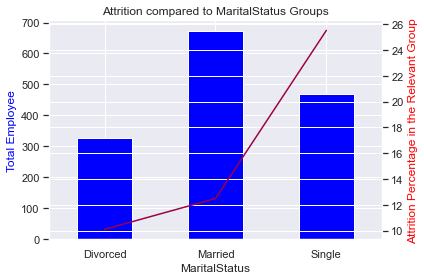

In [63]:
# Attrition compared to Job Satisfaction
graph_df(x = 'MaritalStatus')

In [64]:
# Monthly Income Level
table_df(x = "MonthlyIncome")
bins = [1000, 2000, 3000, 4000, 5000, 7500, 9000, 11000, 15000, 20000]
group_names = ['1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-7500', 
               '7500-9000', '9000-11000', '11000-15000', '15000-20000']             
df1["MonthlyIncome"] = pd.cut(df1["MonthlyIncome"], bins, labels = group_names)
# Monthly Income & Attrition Table
table_df(x = "MonthlyIncome")

,MonthlyIncome,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1000-2000,33,18,54.545455,7.594937
1,2000-3000,362,95,26.243094,40.084388
2,3000-4000,148,24,16.216216,10.126582
3,4000-5000,206,26,12.621359,10.970464
4,5000-7500,310,30,9.677419,12.658228
5,7500-9000,78,10,12.820513,4.219409
6,9000-11000,118,22,18.644068,9.282700
7,11000-15000,82,7,8.536585,2.953586
8,15000-20000,133,5,3.759398,2.109705


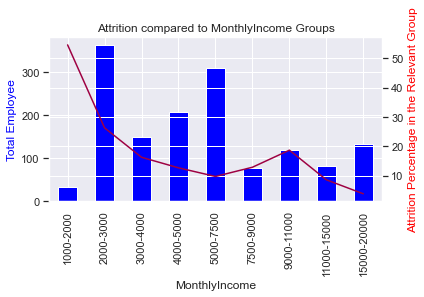

In [65]:
# Attrition compared to Monthly Income Level Graph
graph_df(x = "MonthlyIncome", z = 90)

In [66]:
# Labeling Numbers Companied Worked Groups
table_df(x = 'NumCompaniesWorked')
bins = [0, 1, 2, 3, 4, 5, 10]
group_names = ['0', '1', '2', '3', '4', '5+']             
df1['NumCompaniesWorked'] = pd.cut(df1['NumCompaniesWorked'], bins, labels = group_names, 
                                        include_lowest = True, right = False)
# Numbers Companied Worked & Attrition Table
table_df(x = 'NumCompaniesWorked')

,NumCompaniesWorked,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,197,23,11.675127,9.704641
1,1,521,98,18.809981,41.350211
2,2,146,16,10.958904,6.751055
3,3,159,16,10.062893,6.751055
4,4,139,17,12.230216,7.172996
5,5+,308,67,21.753247,28.270042


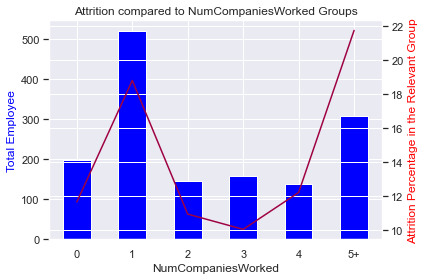

In [67]:
# Attrition compared to Numbers of Companies Worked Graph
graph_df(x = 'NumCompaniesWorked')

In [68]:
# Numbers Companied Worked & Attrition Table
table_df(x = 'OverTime')



,OverTime,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,No,1054,110,10.436433,46.413502
1,Yes,416,127,30.528846,53.586498


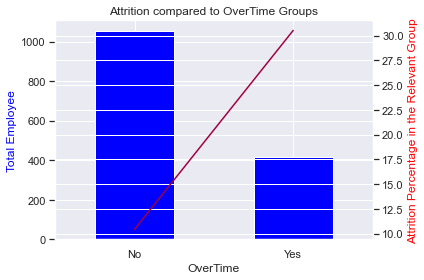

In [69]:
# Attrition compared to Numbers of Companies Worked Graph
graph_df(x = 'OverTime')

In [70]:
# Percent Salary Hike & Attrition Table
table_df(x = 'PercentSalaryHike')
bins = [10, 14, 18, 22, 25]
group_names = ['11-14', '15-18', '19-22', '23-25']             
df1['PercentSalaryHike'] = pd.cut(df1['PercentSalaryHike'], bins, labels = group_names)
# Percent Salary Hike & Attrition Table
table_df(x = 'PercentSalaryHike')

,PercentSalaryHike,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,11-14,818,132,16.136919,55.696203
1,15-18,350,59,16.857143,24.894515
2,19-22,235,33,14.042553,13.924051
3,23-25,67,13,19.402985,5.485232


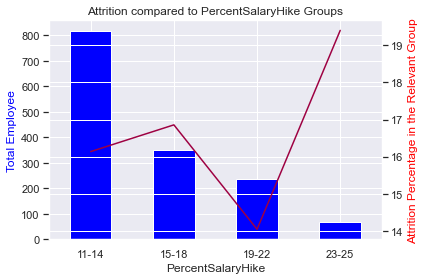

In [71]:
# Attrition compared to Percent Salary Hike
graph_df(x = 'PercentSalaryHike')

In [72]:
# Performance Rating & Attrition Table
table_df(x = 'PerformanceRating')

,PerformanceRating,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,3,1244,200,16.077170,84.388186
1,4,226,37,16.371681,15.611814


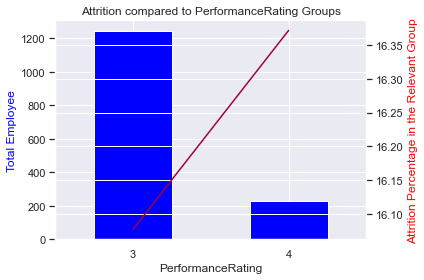

In [73]:
# Attrition compared to Performance Rating
graph_df(x = 'PerformanceRating')

In [74]:
# Labeling Relationship Satisfaction Levels
table_df(x = 'RelationshipSatisfaction')
df1['RelationshipSatisfaction'] = df1['RelationshipSatisfaction'].map({1:'Low', 2:'Medium', 
                                                                       3:'High', 4:'Very High'})
# Relationship & Attrition Table
table_df(x = 'RelationshipSatisfaction')

,RelationshipSatisfaction,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,High,459,71,15.468410,29.957806
1,Low,276,57,20.652174,24.050633
2,Medium,303,45,14.851485,18.987342
3,Very High,432,64,14.814815,27.004219


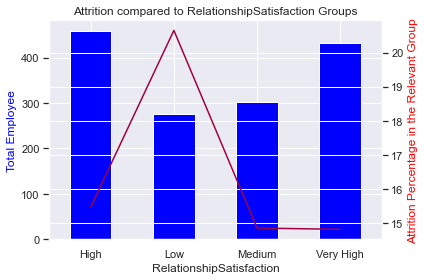

In [75]:
# Attrition compared to Relationship Satisfaction Graph
graph_df(x = 'RelationshipSatisfaction')


In [76]:
# Relationship & Attrition Table
table_df(x = 'StockOptionLevel')

,StockOptionLevel,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,631,154,24.405705,64.978903
1,1,596,56,9.395973,23.628692
2,2,158,12,7.594937,5.063291
3,3,85,15,17.647059,6.329114


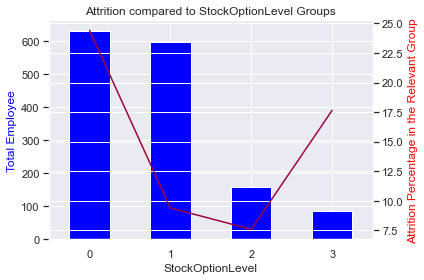

In [77]:
# Attrition compared to Stock Option Level Graph
graph_df(x = 'StockOptionLevel')

In [78]:
# Total Working Years & Attrition Table
table_df(x = 'TotalWorkingYears')
bins = [0, 1, 5, 10, 15, 20, 40]
group_names = ['1', '2-5', '6-10', '11-15', '16-20', '20+']             
df1['TotalWorkingYears'] = pd.cut(df1['TotalWorkingYears'], bins, labels = group_names, 
                                  include_lowest = True)
# Total Working Years & Attrition Table
table_df(x = 'TotalWorkingYears')

,TotalWorkingYears,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,92,45,48.913043,18.987342
1,2-5,224,46,20.535714,19.409283
2,6-10,607,91,14.991763,38.396624
3,11-15,191,24,12.565445,10.126582
4,16-20,149,15,10.067114,6.329114
5,20+,207,16,7.729469,6.751055


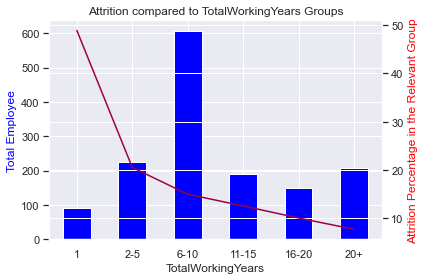

In [79]:
graph_df(x = 'TotalWorkingYears')

In [80]:
# Training Times Last Year & Attrition Table
table_df(x = 'TrainingTimesLastYear')

,TrainingTimesLastYear,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,54,15,27.777778,6.329114
1,1,71,9,12.676056,3.797468
2,2,547,98,17.915905,41.350211
3,3,491,69,14.052953,29.113924
4,4,123,26,21.138211,10.970464
5,5,119,14,11.764706,5.907173
6,6,65,6,9.230769,2.531646


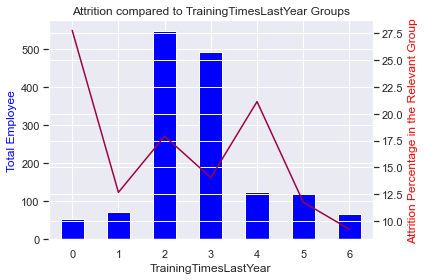

In [81]:
# Attrition compared to Training Times Last Year Graph
graph_df(x = 'TrainingTimesLastYear')

In [82]:
# Labeling Work Life Balance Groups
table_df(x = 'WorkLifeBalance')
df1['WorkLifeBalance'] = df1['WorkLifeBalance'].map({1:'Bad', 2:'Good', 
                                                     3:'Better', 4:'Best'})
# Work Life Balance & Attrition Table
table_df(x = 'WorkLifeBalance')

,WorkLifeBalance,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Bad,80,25,31.250000,10.548523
1,Best,153,27,17.647059,11.392405
2,Better,893,127,14.221725,53.586498
3,Good,344,58,16.860465,24.472574


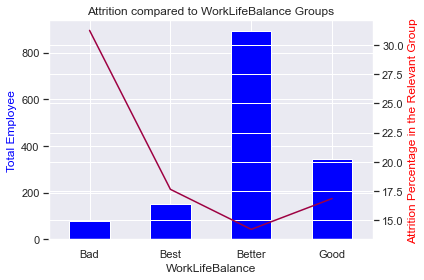

In [83]:
# Attrition compared to Work Life Balance Graph
graph_df(x = 'WorkLifeBalance')

In [84]:
# Labeling Years at Company Groups
table_df(x = 'YearsAtCompany')
bins = [0, 1, 5, 10, 40]
group_names = ['1', '2-5', '6-10', '10+']             
df1['YearsAtCompany'] = pd.cut(df1['YearsAtCompany'], bins, labels = group_names, 
                               include_lowest = True)
# Years at Company & Attrition Table
table_df(x = 'YearsAtCompany')

,YearsAtCompany,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,215,75,34.883721,31.645570
1,2-5,561,87,15.508021,36.708861
2,6-10,448,55,12.276786,23.206751
3,10+,246,20,8.130081,8.438819


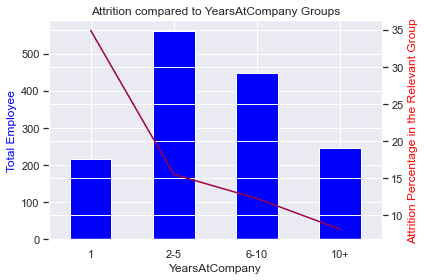

In [85]:
# Years at Company & Attrition Graph 
graph_df(x = 'YearsAtCompany')

In [86]:
# Labeling Years in Current Role Groups
table_df(x = 'YearsInCurrentRole')
bins = [0, 1, 4, 6, 7, 10, 18]
group_names = ['1', '2-4', '5-6', '7', '8-10', '10+']             
df1['YearsInCurrentRole'] = pd.cut(df1['YearsInCurrentRole'], bins, labels = group_names, 
                                   include_lowest = True)
# Years at Company & Attrition Table
table_df(x = 'YearsAtCompany')

,YearsAtCompany,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,215,75,34.883721,31.645570
1,2-5,561,87,15.508021,36.708861
2,6-10,448,55,12.276786,23.206751
3,10+,246,20,8.130081,8.438819


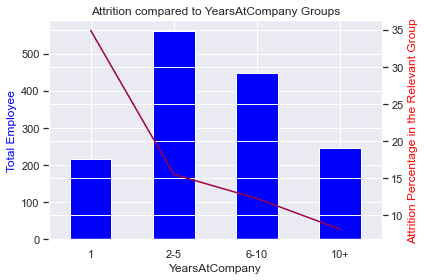

In [87]:
# Years in Current Role & Attrition Graph 
graph_df(x = 'YearsAtCompany')

In [88]:
# Labeling Years in Current Role Groups
table_df(x = 'YearsSinceLastPromotion')
bins = [0, 1, 2, 3, 4, 7, 8, 16]
group_names = ['0', '1', '2', '3', '4-6', '7', '8+']             
df1['YearsSinceLastPromotion'] = pd.cut(df1['YearsSinceLastPromotion'], bins, labels = group_names, 
                                        include_lowest = True, right = False)
# Years Since Last Promotion & Attrition Table
table_df(x = 'YearsSinceLastPromotion')

,YearsSinceLastPromotion,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,581,110,18.932874,46.413502
1,1,357,49,13.725490,20.675105
2,2,159,27,16.981132,11.392405
3,3,52,9,17.307692,3.797468
4,4-6,138,13,9.420290,5.485232
5,7,76,16,21.052632,6.751055
6,8+,107,13,12.149533,5.485232


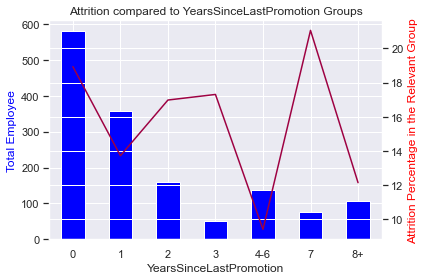

In [89]:
# Years Since Last Promotion & Attrition Graph
graph_df(x = 'YearsSinceLastPromotion')

In [90]:
# Labeling Years with Current Manager Groups
table_df(x = 'YearsWithCurrManager')
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 18]
group_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10+']             
df1['YearsWithCurrManager'] = pd.cut(df1['YearsWithCurrManager'], bins, labels = group_names, 
                                     include_lowest = True, right = False)
# Years with Current Manager & Attrition Table
table_df(x = 'YearsWithCurrManager')

,YearsWithCurrManager,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,263,85,32.319392,35.864979
1,1,76,11,14.473684,4.641350
2,2,344,50,14.534884,21.097046
3,3,142,19,13.380282,8.016878
4,4,98,11,11.224490,4.641350
5,5,31,4,12.903226,1.687764
6,6,29,4,13.793103,1.687764
7,7,216,31,14.351852,13.080169
8,8,107,10,9.345794,4.219409
9,9,64,6,9.375000,2.531646


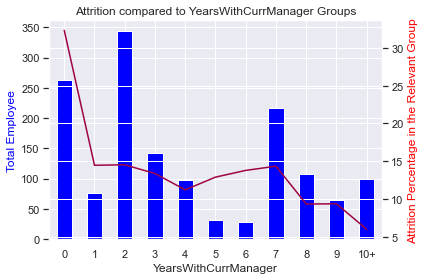

In [91]:
# Years with Current Manager & Attrition Graph
graph_df(x = 'YearsWithCurrManager')

<AxesSubplot:>

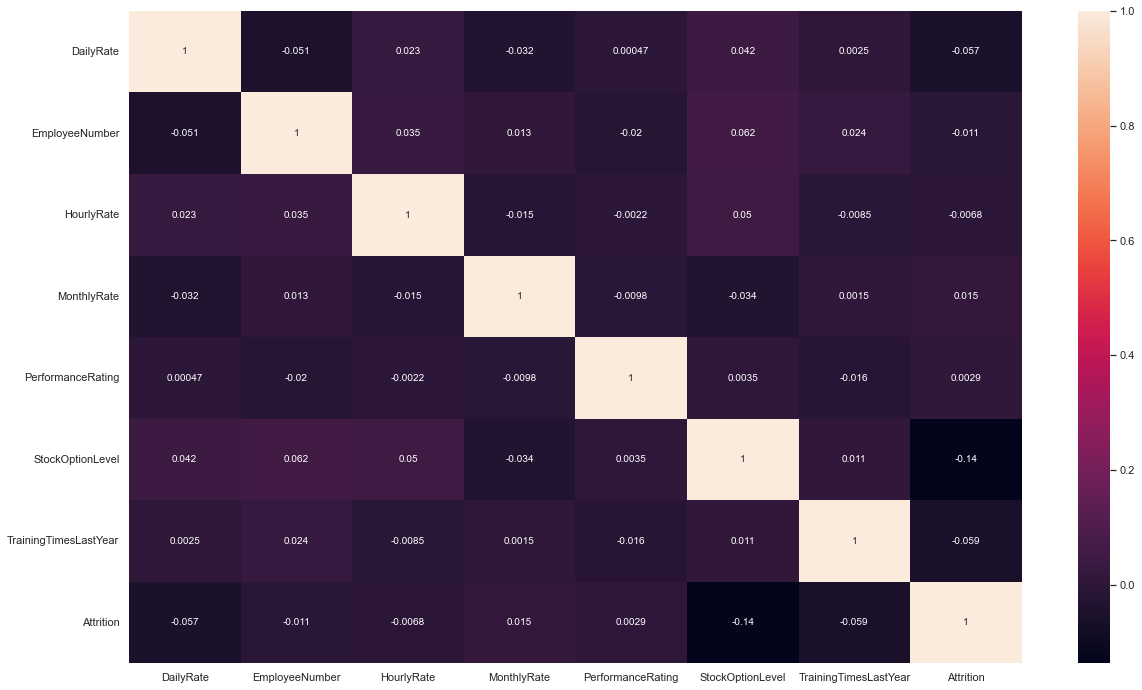

In [92]:
#Correlation

corr_matrix = df1.corr()
f , ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr_matrix, vmax=1, annot=True)

In [98]:
# Drop useless features and rename the dataframe
df2 = df.drop(labels = ['Over18','StandardHours','EmployeeCount'], axis = 1)

In [99]:
# Moving Response Variable to the last column
front = df2['Attrition']
df2.drop(labels=['Attrition'], axis=1,inplace=True)
df2.insert(31,'Attrition',front)

In [100]:
# Changing object types to categories
cols = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for col in cols:
    df2[col] = df2[col].astype('category')

### Hypothesis Testing

#### Selecting appropriate Test

In [101]:
# Gender & Attrition Table
table_df(x = 'Gender')

,Gender,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Female,588,87,14.795918,36.708861
1,Male,882,150,17.006803,63.291139


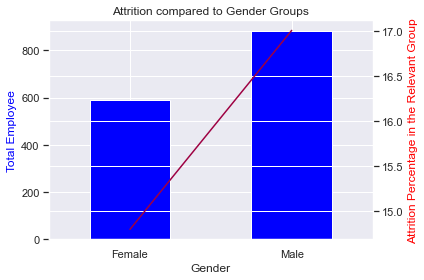

In [102]:
# Attrition compared to Gender Graph
graph_df(x = 'Gender')


#### Frequentist statistical Approach

In [103]:
# Assign female and  male into variables
female = df2[df2['Gender'] == 'Female']
male = df2[df2['Gender'] == 'Male']

# Find the mean for female and male employees attrition
female_attrition_mean = female['Attrition'].mean()
male_attrition_mean = male['Attrition'].mean()
print ('Female attrition mean: {}'.format(female_attrition_mean))
print ('Male attrition mean: {}'.format(male_attrition_mean))

# Find the difference of female and male employees attrition
diff_mean = male_attrition_mean - female_attrition_mean
print ('Difference of mean between male and female employees attrition: {}'.format(diff_mean))

Female attrition mean: 0.14795918367346939
Male attrition mean: 0.17006802721088435
Difference of mean between male and female employees attrition: 0.022108843537414963


#### z-score

In [104]:
# Compute z-score
male_attrition = np.sum(male['Attrition'])
female_attrition = np.sum(female['Attrition'])
male_ln = len(male)
female_ln = len(female)            
phat = (male_attrition + female_attrition) / (male_ln + female_ln)
z = (diff_mean) / np.sqrt(phat * (1 - phat) * (( 1/ float(male_ln)) + (1/float(female_ln))))
print ('z score:{}'.format(z))

z score:1.1292547809155016


#### p-value

In [105]:
# Compute p-value
p = stats.norm.cdf(-z)*2
print ('p-value:{}'.format(p))


p-value:0.2587903704911598


#### Margin of error

In [106]:
# Compute margin of error
moe = 1.96 * np.sqrt(phat * (1 - phat) * (( 1/ float(male_ln)) + (1/float(female_ln))))
print("Margin of Error: {}".format(moe))

Margin of Error: 0.03837338930564671


#### Confidence Interval

In [107]:
# Compute confidence interval
ci = diff_mean + np.array([-1, 1]) * moe
print("Confidence interval: {}".format(ci))

Confidence interval: [-0.01626455  0.06048223]


The p-value is above the significance level (0.05). We can conclude that there is no enough evidence to reject the assumption of no difference in the proportion of attrition for male and female employees in the company.

### Machine Learning

In [126]:
# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from scipy.stats import randint
from IPython.display import Image
from sklearn.model_selection import train_test_split

# Model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import CountVectorizer

# Import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
#dropping the unwanted columns
df2.drop(['EmployeeNumber', 'PerformanceRating'], axis = 1, inplace = True)

In [112]:
#categorical to numerical
# Extract categorical features from dataset
cat_df = df2.select_dtypes(include='category')
cat_df.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [113]:
# Extract categorical features from dataset
num_df = df2.select_dtypes(include='int64')
num_df.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [114]:
# One hot encode categorical dataframe
features_categorical = pd.get_dummies(cat_df, drop_first=True)
features_categorical.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [115]:
# concatenate the features
df3 = pd.concat([num_df, features_categorical], axis=1)
df3.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,...,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,1,0,8,0,1,...,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,1,10,3,3,...,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,2,0,7,3,3,...,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,0,8,3,3,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,4,1,6,3,3,...,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [116]:
# Moving Response Variable to the last column
response = df3['Attrition']
df3 = df3.drop(labels=['Attrition'], axis=1)
df3.insert(43,'Attrition',response)
df3.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,...,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Attrition
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,1,0,8,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,1,10,3,3,...,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,2,0,7,3,3,...,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,0,8,3,3,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,4,1,6,3,3,...,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0


### Data Preprocessing 

#### Seperate response variable and feature

In [117]:
X = df3.iloc[:, :-1].values   
y = df3.iloc[:, 43].values  

In [118]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [119]:
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [122]:
pip install imbalanced-learn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
Note: you may need to restart the kernel to use updated packages.


In [132]:
pip install scikit-learn

In [136]:
import sklearn


In [139]:
pip install Tensorflow


  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=ae62a4afb902d7bfbad47b6ccc819a4f4c4d2c83fe2d9028f43efc286f33dd3a
  Stored in directory: c:\users\jayasri\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [140]:
from sklearn.base import BaseEstimator, TransformerMixin

In [150]:
!pip3 install imblearn

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

#preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder

In [143]:
pca = PCA(n_components = None)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.12486093, 0.08121904, 0.04855005, 0.04613273, 0.03961162,
       0.03781586, 0.03185218, 0.0306271 , 0.02865843, 0.02813661,
       0.02742027, 0.02712749, 0.02659827, 0.02583372, 0.02566171,
       0.02482174, 0.02448455, 0.02352107, 0.02310324, 0.02258035,
       0.0221166 , 0.02114342, 0.02109791, 0.02042161, 0.02010452,
       0.01963182, 0.01853432, 0.01744071, 0.0169279 , 0.01550109,
       0.01279423, 0.01122948, 0.00690292, 0.0061173 , 0.00507762,
       0.00460703, 0.00389549, 0.00318763, 0.00226448, 0.00083839,
       0.00073865, 0.00058753, 0.00022239])

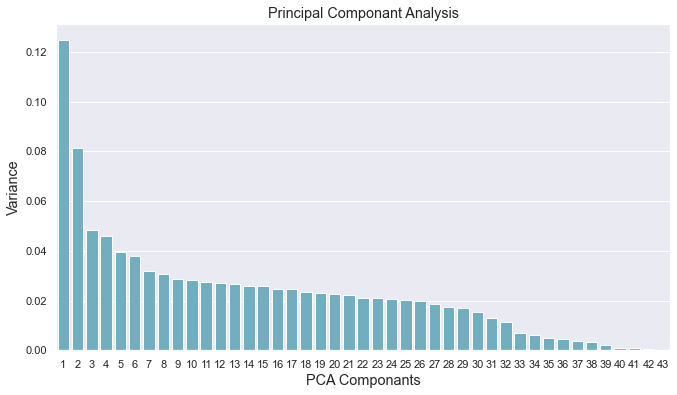

In [144]:
df_pca = pd.DataFrame({'var':explained_variance,
             'PC':list(range(1,44))})
fig = plt.figure(figsize=(11,6))
fig=sns.barplot(x = 'PC', y = "var", data = df_pca, color = "c")
plt.xlabel('PCA Componants', fontsize = 'x-large')
plt.ylabel('Variance', fontsize = 'x-large')
plt.title('Principal Componant Analysis', fontsize = 'x-large')
plt.show()

In [145]:
df_cumus = pd.DataFrame({'total_var':np.cumsum(df_pca['var'].values)})
